# Shopify Data Science Intern Challenge Question 1.

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \\$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


- a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Answer: There is significant outliers in the data, after adjusting for outliers the new value makes much more sense.
- b) What metric would you report for this dataset?

Answer: I would use an adjusted AOV, removing the outliers from the data.
- c) What is its value?

Answer: After removing the outliers (top 2% of values), the adjusted AOV, which more closely reflects the average consumer, is 297.67

### The details of the calculations can be found below question 2, with some extra exploratory analysis at the bottom to look for any further trends/groups in the data.

# Shopify Data Science Intern Challenge Question 2.

- a) How many orders were shipped by Speedy Express in total?

Answer: 54 orders were shipped by Speedy Express in total
    
Query:  

    SELECT COUNT(Orders.OrderID)
    FROM [Orders]
    JOIN Shippers
    ON Orders.ShipperID = Shippers.ShipperID
    WHERE Shippers.ShipperID = 1

- b) What is the last name of the employee with the most orders?

Answer: Peacock is the last name of the employee with the most orders

Query: 

    SELECT COUNT(Orders.EmployeeID) as num_orders, Orders.EmployeeID, Employees.LastName
    FROM [Orders]
    JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
    GROUP BY Orders.EmployeeID
    ORDER BY num_orders DESC
    LIMIT 1
    
- c) What product was ordered the most by customers in Germany?

Answer: Out of all products, Boston Crab Meat was ordered the most by customers in Germany.

Query:
 
    SELECT Customers.Country, OrderDetails.ProductID, SUM(OrderDetails.Quantity) as total_product_quantity, 
    Products.ProductID, Products.ProductName
    FROM Orders
    JOIN Customers 
    ON Customers.CustomerID = Orders.CustomerID
    JOIN OrderDetails
    ON Orders.OrderID = OrderDetails.OrderID
    JOIN Products
    ON Products.ProductID = OrderDetails.ProductID
    WHERE Customers.Country = "Germany"
    GROUP BY OrderDetails.ProductID
    ORDER BY total_product_quantity DESC
    LIMIT 1

# Code for Question 1:

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [325]:
rawData = pd.read_csv("ShopifyChallengeData.csv")

In [326]:
rawData.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_day
0,1,53,746,224,2,cash,3/13/2017 12:36,"Monday, March 13, 2017"
1,2,92,925,90,1,cash,3/3/2017 17:38,"Friday, March 3, 2017"
2,3,44,861,144,1,cash,3/14/2017 4:23,"Tuesday, March 14, 2017"
3,4,18,935,156,1,credit_card,3/26/2017 12:43,"Sunday, March 26, 2017"
4,5,18,883,156,1,credit_card,3/1/2017 4:35,"Wednesday, March 1, 2017"


In [327]:
rawData.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [328]:
def AOV(order_amounts):
    """
    takes in some order values and returns the AOV of those values
    """
    AOV = 0
    numVals = 0 
    for i in order_amounts:
        AOV += i
        numVals += 1
    AOV /= numVals
    return AOV
AOV(rawData["order_amount"])

3145.128

## From the calculations above, AOV = 3145.13
Shoes shouldn't be that expensive, something is skewing the data. Lets take a look at the values.

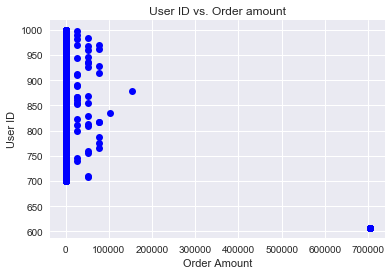

In [329]:
plt.plot(rawData["order_amount"], rawData["user_id"], "bo")
plt.ylabel("User ID")
plt.xlabel("Order Amount")
plt.title("User ID vs. Order amount")
plt.show()

## There is a very obvious outlier that would be drastically skewing the AOV, and potentially some others, the outliers seem to be ordered by the same users everytime. lets take a closer look at those values

In [330]:
userOrderData = rawData[["user_id", "order_amount", "total_items"]]
potentialOutliers = []
for i in range(0, len(userOrderData["order_amount"])):
    if (userOrderData["order_amount"][i] > 50000):
        potentialOutliers.append([userOrderData["user_id"][i], userOrderData["order_amount"][i], userOrderData["total_items"][i]])
potentialOutliers

[[607, 704000, 2000],
 [607, 704000, 2000],
 [936, 51450, 2],
 [983, 51450, 2],
 [967, 51450, 2],
 [607, 704000, 2000],
 [760, 51450, 2],
 [878, 154350, 6],
 [607, 704000, 2000],
 [775, 77175, 3],
 [607, 704000, 2000],
 [607, 704000, 2000],
 [810, 51450, 2],
 [607, 704000, 2000],
 [607, 704000, 2000],
 [607, 704000, 2000],
 [607, 704000, 2000],
 [709, 51450, 2],
 [834, 102900, 4],
 [707, 51450, 2],
 [935, 51450, 2],
 [915, 77175, 3],
 [962, 77175, 3],
 [869, 51450, 2],
 [814, 51450, 2],
 [607, 704000, 2000],
 [817, 77175, 3],
 [607, 704000, 2000],
 [855, 51450, 2],
 [927, 51450, 2],
 [607, 704000, 2000],
 [928, 77175, 3],
 [828, 51450, 2],
 [766, 77175, 3],
 [607, 704000, 2000],
 [946, 51450, 2],
 [787, 77175, 3],
 [960, 51450, 2],
 [756, 51450, 2],
 [969, 77175, 3],
 [607, 704000, 2000],
 [818, 77175, 3],
 [607, 704000, 2000],
 [607, 704000, 2000]]

## Now we see that user 607 has many orders of 704000, this warrants further internal investigation into that, could be a repeated order from another store? Could be a customer with an extremely large standing order? 

We also see that there are some very expensive orders with very few item, this also warrants further investigation.

Lets take a closer look at user 607

In [331]:
user607Orders = pd.DataFrame(columns= rawData.columns)
for i in range(0, len(rawData["order_amount"])):
    if (rawData["user_id"][i] == 607):
        user607Orders.loc[len(user607Orders)] = rawData.iloc[i]
        user607Orders = user607Orders.sort_index()
user607Orders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_day
0,16,42,607,704000,2000,credit_card,3/7/2017 4:00,"Tuesday, March 7, 2017"
1,61,42,607,704000,2000,credit_card,3/4/2017 4:00,"Saturday, March 4, 2017"
2,521,42,607,704000,2000,credit_card,3/2/2017 4:00,"Thursday, March 2, 2017"
3,1105,42,607,704000,2000,credit_card,3/24/2017 4:00,"Friday, March 24, 2017"
4,1363,42,607,704000,2000,credit_card,3/15/2017 4:00,"Wednesday, March 15, 2017"
5,1437,42,607,704000,2000,credit_card,3/11/2017 4:00,"Saturday, March 11, 2017"
6,1563,42,607,704000,2000,credit_card,3/19/2017 4:00,"Sunday, March 19, 2017"
7,1603,42,607,704000,2000,credit_card,3/17/2017 4:00,"Friday, March 17, 2017"
8,2154,42,607,704000,2000,credit_card,3/12/2017 4:00,"Sunday, March 12, 2017"
9,2298,42,607,704000,2000,credit_card,3/7/2017 4:00,"Tuesday, March 7, 2017"


## This warrants further investigation, but for the purposes of this exercise we will just neglect these values and get an adjusted AOV

In [332]:
adjustedUserOrders = pd.DataFrame(columns=rawData.columns)
for i in range(0, len(rawData["order_amount"])):
    if (rawData["user_id"][i] != 607):
        adjustedUserOrders.loc[len(adjustedUserOrders)] = rawData.iloc[i]
        adjustedUserOrders = adjustedUserOrders.sort_index()
adjustedUserOrders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_day
0,1,53,746,224,2,cash,3/13/2017 12:36,"Monday, March 13, 2017"
1,2,92,925,90,1,cash,3/3/2017 17:38,"Friday, March 3, 2017"
2,3,44,861,144,1,cash,3/14/2017 4:23,"Tuesday, March 14, 2017"
3,4,18,935,156,1,credit_card,3/26/2017 12:43,"Sunday, March 26, 2017"
4,5,18,883,156,1,credit_card,3/1/2017 4:35,"Wednesday, March 1, 2017"
5,6,58,882,138,1,credit_card,3/14/2017 15:25,"Tuesday, March 14, 2017"
6,7,87,915,149,1,cash,3/1/2017 21:37,"Wednesday, March 1, 2017"
7,8,22,761,292,2,cash,3/8/2017 2:05,"Wednesday, March 8, 2017"
8,9,64,914,266,2,debit,3/17/2017 20:56,"Friday, March 17, 2017"
9,10,52,788,146,1,credit_card,3/30/2017 21:08,"Thursday, March 30, 2017"


In [333]:
AOV(adjustedUserOrders["order_amount"])

754.0919125025085

## We get an adjusted AOV of 754.09, a much more reasonable number, after removing all of the orders from user 607

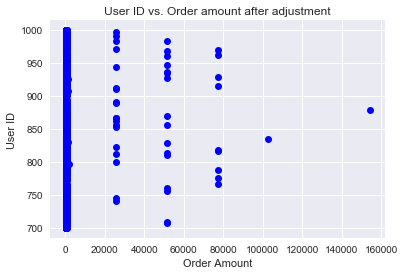

In [334]:
plt.plot(adjustedUserOrders["order_amount"], adjustedUserOrders["user_id"], "bo")
plt.ylabel("User ID")
plt.xlabel("Order Amount")
plt.title("User ID vs. Order amount after adjustment")
plt.show()

## There still seems to be a very large amount of orders very close to 0, we also noted these orders from earlier because of their total_items amount. Lets split up the data further

## Might be worth it to create a function that will give AOV for a certain quantile.

In [335]:
def quantileAOV(order_amounts, q):
    """
    calculates the AOV for orders within a certain quantile, given by q.
    i.e. quantileAOV(data, 0.9) will return the AOV for orders, removing the 10% highest outliers
    """
    quantileMax = order_amounts.quantile(q)
    reducedData = order_amounts[order_amounts <= quantileMax]
    return AOV(reducedData)

In [336]:
quantileAOV(rawData["order_amount"], 1) # gives expected value for all data

3145.128

In [337]:
quantileAOV(rawData["order_amount"], 0.99)

400.04338175948345

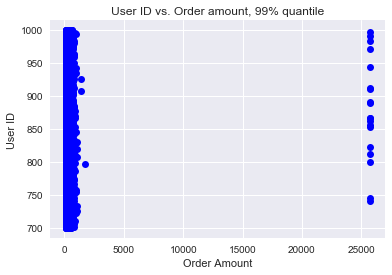

In [338]:
order_amounts = rawData["order_amount"]
quantileMax = order_amounts.quantile(0.99)
reducedData = rawData[order_amounts <= quantileMax]
plt.plot(reducedData["order_amount"], reducedData["user_id"], "bo")
plt.ylabel("User ID")
plt.xlabel("Order Amount")
plt.title("User ID vs. Order amount, 99% quantile")
plt.show()

## Now even for 99% of the data we have an AOV of 400.04, which makes more sense in terms of regular people buying shoes. 

## The top 1% may be other vendors buying wholesale to sell or something along those lines

## Even for 99%, there are still outliers, lets try 98%

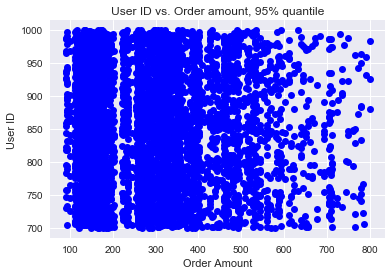

In [339]:
order_amounts = rawData["order_amount"]
quantileMax = order_amounts.quantile(0.98)
reducedData = rawData[order_amounts <= quantileMax]
plt.plot(reducedData["order_amount"], reducedData["user_id"], "bo")
plt.ylabel("User ID")
plt.xlabel("Order Amount")
plt.title("User ID vs. Order amount, 95% quantile")
plt.show()

In [340]:
quantileAOV(rawData["order_amount"], 0.98)

297.66714285714284

## Now we see a much more even spread of orders by price, we know that we have a number of very large orders, but for the most the average consumer, this value of 297.67 seems to be more accurate

# ------------------------------------------------------------------------------------------------------------

# We can also look at the sales by day of week, there is often some kind of trend there

In [370]:
# create day of week column
days = []
for i in range(0, len(rawData["order_amount"])):
    days.append(rawData["created_at_day"][i].split(",")[0])

In [342]:
rawData.insert(len(rawData.columns), "created_at_day_of_week", days)
rawData.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_day,created_at_day_of_week
0,1,53,746,224,2,cash,3/13/2017 12:36,"Monday, March 13, 2017",Monday
1,2,92,925,90,1,cash,3/3/2017 17:38,"Friday, March 3, 2017",Friday
2,3,44,861,144,1,cash,3/14/2017 4:23,"Tuesday, March 14, 2017",Tuesday
3,4,18,935,156,1,credit_card,3/26/2017 12:43,"Sunday, March 26, 2017",Sunday
4,5,18,883,156,1,credit_card,3/1/2017 4:35,"Wednesday, March 1, 2017",Wednesday


In [343]:
# find order volume per day and order amount per day
orders_per_day = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
order_value_per_day = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
for i in range(0, len(rawData["order_amount"])):
    orders_per_day[rawData["created_at_day_of_week"][i]] += 1
    order_value_per_day[rawData["created_at_day_of_week"][i]] += rawData["order_amount"][i]
orders_per_day

{'Friday': 682,
 'Monday': 635,
 'Saturday': 675,
 'Sunday': 646,
 'Thursday': 843,
 'Tuesday': 698,
 'Wednesday': 821}

In [344]:
# create data to plot
days = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday',
       'Saturday', 'Sunday']
daily_orders = [orders_per_day[day] for day in days]
daily_amounts = [order_value_per_day[day] for day in days]

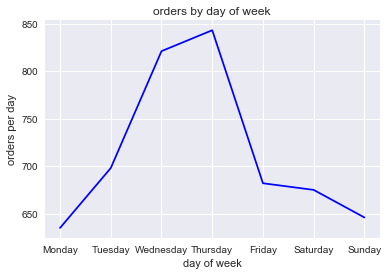

In [345]:
plt.plot(days, daily_orders, 'b-')
plt.xlabel("day of week")
plt.ylabel("orders per day")
plt.title("orders by day of week")
plt.show()

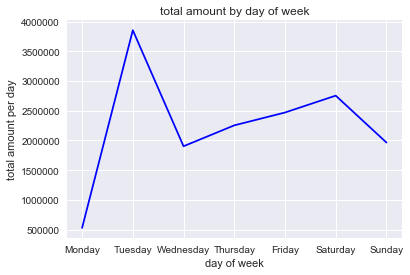

In [346]:
plt.plot(days, daily_amounts, 'b-')
plt.xlabel("day of week")
plt.ylabel("total amount per day")
plt.title("total amount by day of week")
plt.show()

## we can see some clear trends:
- number of orders seem to spike in the middle of the week
- there is a price spike on tuesdays, and a smaller one on saturdays, we would expect order value to follow a similar trend to order volume, something is causing this change. User 607 orders on tuesday frequently, which may account for this.

## Lets do the same with the 98% quantile, for the more average customer

In [347]:
# filter data
quantileMax = order_amounts.quantile(0.98)
reducedData = rawData[order_amounts <= quantileMax]
reducedData.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_day,created_at_day_of_week
0,1,53,746,224,2,cash,3/13/2017 12:36,"Monday, March 13, 2017",Monday
1,2,92,925,90,1,cash,3/3/2017 17:38,"Friday, March 3, 2017",Friday
2,3,44,861,144,1,cash,3/14/2017 4:23,"Tuesday, March 14, 2017",Tuesday
3,4,18,935,156,1,credit_card,3/26/2017 12:43,"Sunday, March 26, 2017",Sunday
4,5,18,883,156,1,credit_card,3/1/2017 4:35,"Wednesday, March 1, 2017",Wednesday


In [348]:
reducedData.index = range(0, len(reducedData["order_amount"]))

In [349]:
orders_per_day = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
order_value_per_day = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
for i in range(0, len(reducedData["order_amount"])):
    orders_per_day[reducedData["created_at_day_of_week"][i]] += 1
    order_value_per_day[reducedData["created_at_day_of_week"][i]] += reducedData["order_amount"][i]
orders_per_day

{'Friday': 666,
 'Monday': 625,
 'Saturday': 659,
 'Sunday': 629,
 'Thursday': 826,
 'Tuesday': 684,
 'Wednesday': 811}

In [350]:
order_value_per_day

{'Friday': 194964,
 'Monday': 186553,
 'Saturday': 200204,
 'Sunday': 190380,
 'Thursday': 250476,
 'Tuesday': 200960,
 'Wednesday': 235032}

In [351]:
days = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday',
       'Saturday', 'Sunday']
daily_orders = [orders_per_day[day] for day in days]
daily_amounts = [order_value_per_day[day] for day in days]

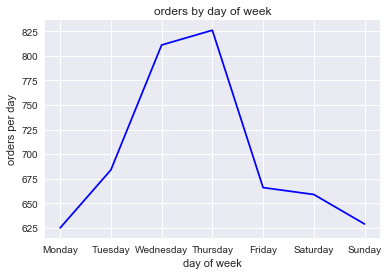

In [352]:
plt.plot(days, daily_orders, 'b-')
plt.xlabel("day of week")
plt.ylabel("orders per day")
plt.title("orders by day of week")
plt.show()

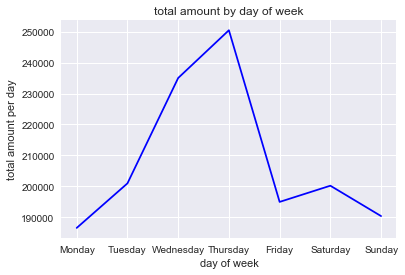

In [353]:
plt.plot(days, daily_amounts, 'b-')
plt.xlabel("day of week")
plt.ylabel("total amount per day")
plt.title("total amount by day of week")
plt.show()

## Some trends here as well:
- we see the same order volume trend, this makes sense as we didn't remove many orders
- we see a new trend, it seems that average consumers order more in the middle of the week, this agrees with the order volume data

# ------------------------------------------------------------------------------------------------------------

# Finally For fun we can try and cluster to see if there are any groups of data hiding

In [354]:
from sklearn.cluster import KMeans

In [355]:
## Lets map the payment_method first
rawDataMapped = rawData.copy()
rawDataMapped["payment_method"].unique()


array(['cash', 'credit_card', 'debit'], dtype=object)

In [356]:
rawDataMapped["payment_method"] = rawDataMapped["payment_method"].map({"cash": 0,"credit_card": 1, "debit": 2})

In [357]:
rawDataMapped.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_day,created_at_day_of_week
0,1,53,746,224,2,0,3/13/2017 12:36,"Monday, March 13, 2017",Monday
1,2,92,925,90,1,0,3/3/2017 17:38,"Friday, March 3, 2017",Friday
2,3,44,861,144,1,0,3/14/2017 4:23,"Tuesday, March 14, 2017",Tuesday
3,4,18,935,156,1,1,3/26/2017 12:43,"Sunday, March 26, 2017",Sunday
4,5,18,883,156,1,1,3/1/2017 4:35,"Wednesday, March 1, 2017",Wednesday


In [358]:
# then drop payment_method because it isnt worth it yet to process it for clustering
clusterData = rawDataMapped.drop(["created_at", "created_at_day_of_week", "created_at_day"], 1)
clusterData.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method
0,1,53,746,224,2,0
1,2,92,925,90,1,0
2,3,44,861,144,1,0
3,4,18,935,156,1,1
4,5,18,883,156,1,1


In [359]:
# we are going to use the elbow method with a WCSS measure to determine the optimal number of clusters 
wcss = []
maxClusters = 10
for i in range(1, maxClusters):
    kmeans = KMeans(i)
    kmeans.fit(clusterData)
    wcss.append(kmeans.inertia_)
wcss

[8530063076963.737,
 151147526838.79593,
 36493918951.03256,
 21985786963.42133,
 16103415107.218014,
 8515455249.662943,
 3446794609.5719423,
 2023570521.67845,
 1427936761.337927]

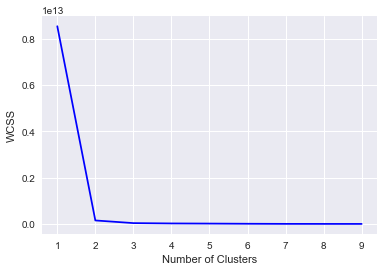

In [360]:
clusterNums = range(1, maxClusters)
plt.plot(clusterNums, wcss, 'b-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [361]:
# the ideal amount seems to be 2, lets add the clusters to the dataframe
kmeans = KMeans(2)
clusters = kmeans.fit_predict(clusterData)
clustered_data = clusterData.copy()
clustered_data["Cluster"] = clusters
clustered_data.describe()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,Cluster
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,1.015400,0.003400
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,0.808018,0.058216
min,1.000000,1.000000,607.000000,90.000000,1.00000,0.000000,0.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,0.000000,0.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,1.000000,0.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,2.000000,0.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,2.000000,1.000000


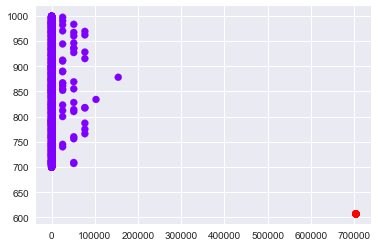

In [362]:
# and plot the clusters
plt.scatter(clustered_data["order_amount"], clustered_data["user_id"], c=clustered_data["Cluster"], cmap="rainbow")

## That didn't work because of user 607, lets try again without them

In [363]:
# we are going to use adjusted data that we defined above, it only has user 607's orders removed, we will follow the same steps
# as above
adjustedDataMapped = adjustedUserOrders.copy()
adjustedDataMapped["payment_method"] = adjustedDataMapped["payment_method"].map({"cash": 0,"credit_card": 1, "debit": 2})
adjustedDataMapped.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_day
0,1,53,746,224,2,0,3/13/2017 12:36,"Monday, March 13, 2017"
1,2,92,925,90,1,0,3/3/2017 17:38,"Friday, March 3, 2017"
2,3,44,861,144,1,0,3/14/2017 4:23,"Tuesday, March 14, 2017"
3,4,18,935,156,1,1,3/26/2017 12:43,"Sunday, March 26, 2017"
4,5,18,883,156,1,1,3/1/2017 4:35,"Wednesday, March 1, 2017"


In [365]:
adjustedClusterData = adjustedDataMapped.drop(["created_at", "created_at_day"], 1)
adjustedClusterData.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method
0,1,53,746,224,2,0
1,2,92,925,90,1,0
2,3,44,861,144,1,0
3,4,18,935,156,1,1
4,5,18,883,156,1,1


In [366]:
wcss = []
maxClusters = 10
for i in range(1, maxClusters):
    kmeans = KMeans(i)
    kmeans.fit(adjustedClusterData)
    wcss.append(kmeans.inertia_)
wcss

[151106383087.73712,
 36452775199.97375,
 24219827109.110756,
 16196434904.902634,
 8336743852.08938,
 3405284931.2738976,
 1981241494.9847844,
 1385526960.680703,
 883335899.782938]

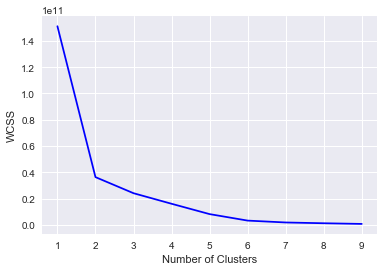

In [367]:
clusterNums = range(1, maxClusters)
plt.plot(clusterNums, wcss, 'b-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## it looks like 2 or 6 clusters are optimal, lets look at both


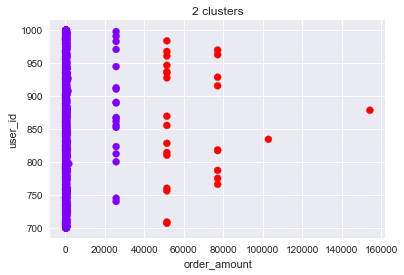

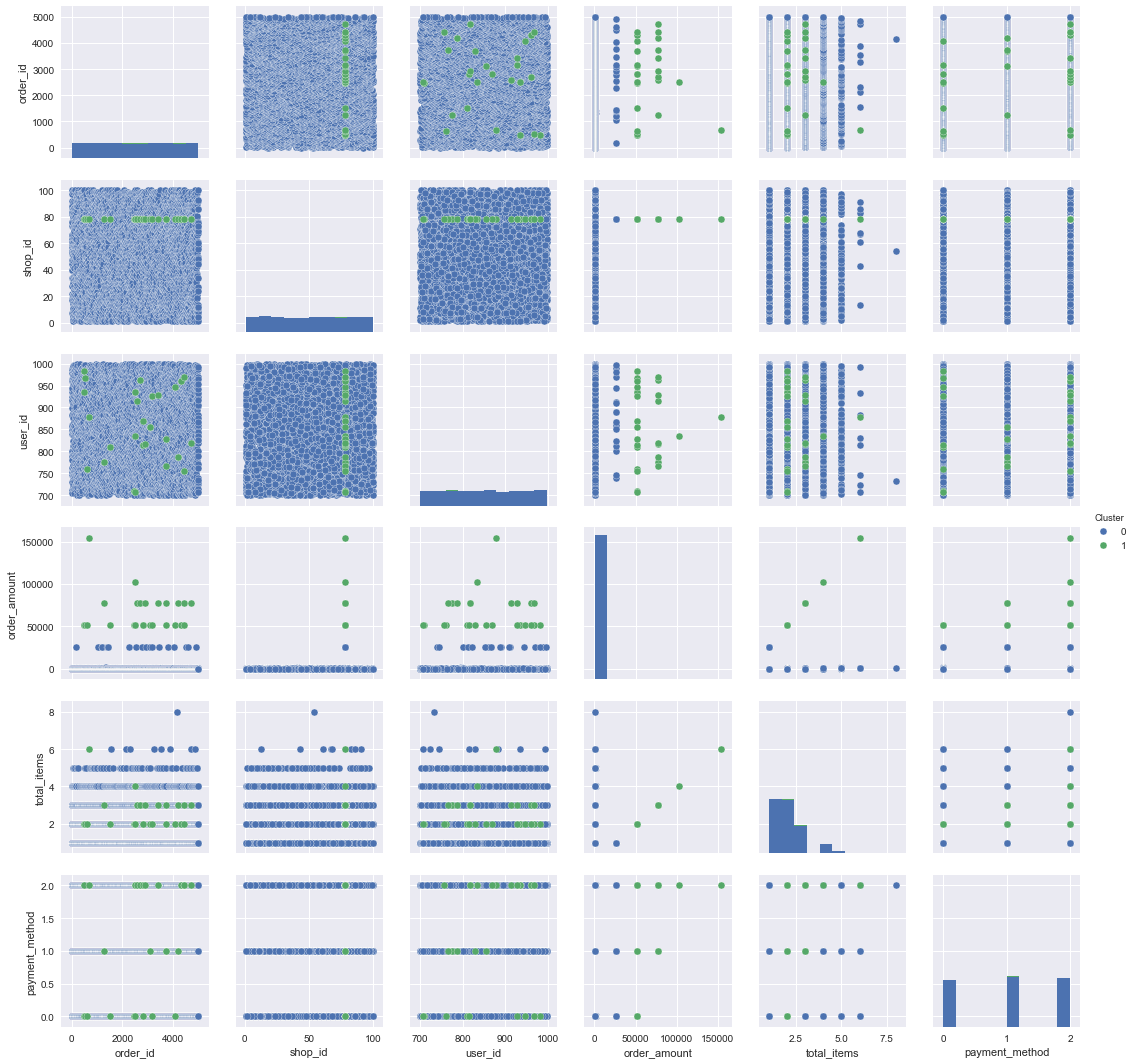

In [368]:
kmeans = KMeans(2)
clusters = kmeans.fit_predict(adjustedClusterData)
clustered_data = adjustedClusterData.copy()
clustered_data["Cluster"] = clusters
plt.scatter(clustered_data["order_amount"], clustered_data["user_id"], c=clustered_data["Cluster"], cmap="rainbow")
plt.title("2 clusters")
plt.xlabel("order_amount")
plt.ylabel("user_id")
sns.pairplot(clustered_data, hue="Cluster", vars=adjustedClusterData.columns)
plt.show()

## 2 clusters seems to split the data into one group of less expensive orders, and one of more expensive orders

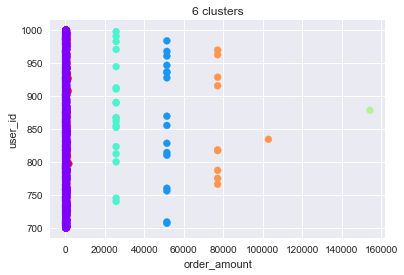

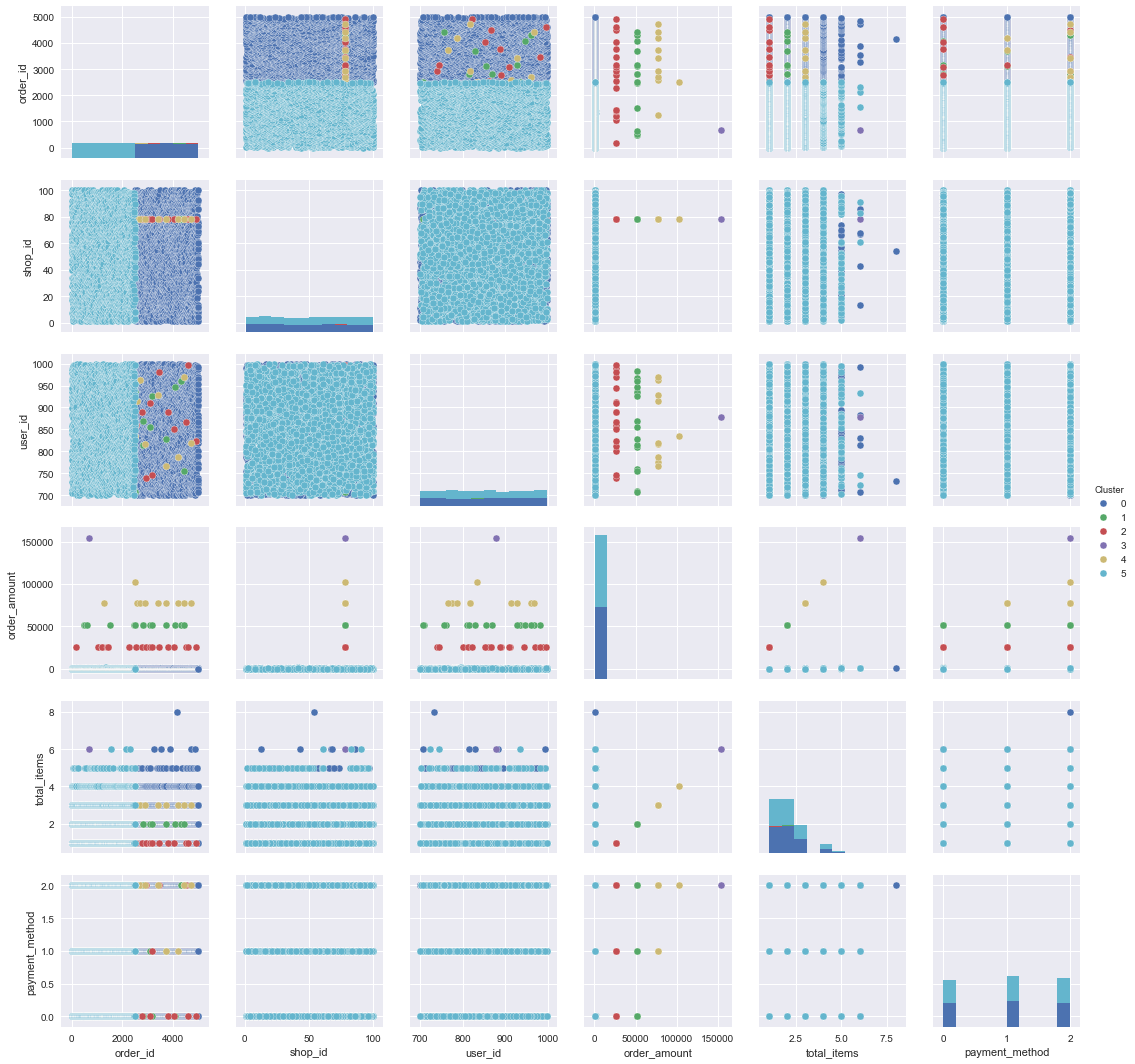

In [369]:
kmeans = KMeans(6)
clusters = kmeans.fit_predict(adjustedClusterData)
clustered_data = adjustedClusterData.copy()
clustered_data["Cluster"] = clusters
plt.scatter(clustered_data["order_amount"], clustered_data["user_id"], c=clustered_data["Cluster"], cmap="rainbow")
plt.title("6 clusters")
plt.xlabel("order_amount")
plt.ylabel("user_id")
sns.pairplot(clustered_data, hue="Cluster", vars=adjustedClusterData.columns)
plt.show()

## 6 clusters seems to split the data into more specific groups based on price

## We also see from the pairplot the orders that we noticed earlier, with few items but a very large price, these should be investigated further with more available data or looking into the stores in which they originated